# Analyse CMB chains

In [49]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import getdist
from getdist import plots, MCSamples
from cobaya.yaml import yaml_load_file

In [51]:
import numpy as np, glob, healpy as H, os, sys
from pylab import *

import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

In [52]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'
rcParams['font.family'] = 'serif'

In [62]:
chains_dic = {
             #'so_baseline_test': 'Test',
             'so_baseline_TTEETE_lcdm': 'SO-Baseline: $\Lambda$CDM',
             'so_baseline_TTEETEPP_lcdm': 'SO-Baseline + $\kappa$: $\Lambda$CDM',
             'so_baseline_TTEETE_w0walcdm': 'SO-Baseline: $w_{0} w_{a} \Lambda$CDM',
             'so_baseline_TTEETEPP_w0walcdm': 'SO-Baseline + $\kappa$: $w_{0} w_{a} \Lambda$CDM',
             'so_baseline_TTEETEPP_desidr2bao_w0walcdm': 'SO-Baseline + $\kappa$ + DESI-DR2: $w_{0} w_{a} \Lambda$CDM',
             'spt3g_TTEETE_lcdm': 'SPT-3G: $\Lambda$CDM',
             'spt3g_TTEETEPP_lcdm': 'SPT-3G + $\kappa$: $\Lambda$CDM',
#              'so_baseline_plus_lensing': 'SO-Baseline + $\kappa$: $\Lambda$CDM',
#              'so_baseline_plus_desidr2bao': 'SO-Baseline + DESI-DR2: $\Lambda$CDM',
             ##'so_goal': 'SO-Goal: $\Lambda$CDM',
             ##'spt3g_winter': 'SPT-3G Main: $\Lambda$CDM',
             ##'s4_wide': 'CMB-S4: $\Lambda$CDM',
             #'spt_hiell_2020_lmax4000': 'SPT-high-$\ell$: $\Lambda$CDM',
             #'so_baseline_plus_desidr2bao': 'SO-Baseline + DESI-DR2 BAO: $\Lambda$CDM',
             }    

chains_to_plot = [
                 #'spt3g_winter', 
                 'spt3g_TTEETE_lcdm', 
                 'spt3g_TTEETEPP_lcdm',
                 'so_baseline_TTEETE_lcdm', 
                 'so_baseline_TTEETEPP_lcdm',
#                  'so_baseline_plus_lensing',
#                  'so_baseline_plus_desidr2bao',
                 ##'so_goal', 
                 ##'s4_wide', 
                ]

color_dic = {'spt3g_winter': 'tab:green', 
             'spt3g_TTEETE_lcdm': 'tab:green', 
             'spt3g_TTEETEPP_lcdm': 'black', 
             'so_baseline_TTEETE_lcdm': 'tab:blue', 
             'so_baseline_TTEETEPP_lcdm': 'tab:orange',
             'so_baseline_TTEETEPP_desidr2bao_w0walcdm': 'brown',
             'so_goal': 'tab:orange', 
             's4_wide': 'black', 
             'so_baseline_multiplebands': 'black'}

samples_dic = {}
for chainname in chains_dic:
    print(chainname)
    #fname = 'chains/mcmc/20250511_wider_cal_priors/%s/%s' %(chainname, chainname)
    fname = 'chains/mcmc/%s/%s' %(chainname, chainname)
    curr_samples = getdist.mcsamples.loadMCSamples( fname )
    print( chainname, fname, curr_samples.samples.shape )
    curr_samples.removeBurn(0.3)
    ##print( curr_samples.samples.shape ); sys.exit()
    '''
    paramnames = curr_samples.getParamNames()
    paramlabels = []
    for ppp in paramnames.list():
        if ppp == 'rdh':
            ppp..title() = 'rdhhhhh'
        paramlabels.append( ppp.label )
    curr_samples = getdist.mcsamples.loadMCSamples('chains/%s/%s' %(chainname, chainname), labels = paramlabels)
    '''
    samples_dic[chainname] = curr_samples
##sys.exit()

mod_samples_dic = {}
for chainname in samples_dic:
    curr_samples = samples_dic[chainname]
    p = curr_samples.getParams()
    paramnames = curr_samples.getParamNames()
    print(paramnames.list())
    '''
    if 'H0' in paramnames.list():
        curr_samples.addDerived(p.rdrag * p.H0/100., name='rdh', label=r'r_dh')
    else:
        if chainname == 'desibao_w0walcdm_fixedhplanckcmb':
            H0 = 67.36
        elif chainname == 'desibao_w0walcdm_fixedhsne':
            H0 = 73.
        else:
            H0 = 67.36
        curr_samples.addDerived(p.rdrag * H0/100., name='rdh', label=r'r_dh')
        curr_stats = curr_samples.getMargeStats()
    '''
    ###print(chainname, curr_samples.samples.shape)
    mod_samples_dic[chainname] = curr_samples.copy()
        
    if 'w' in paramnames.list() and 'wa' in paramnames.list():
        curr_samples.addDerived(p.w + p.wa, name='wpluswa', label=r'$w + w_{a}$')
        curr_stats = curr_samples.getMargeStats()
        mod_samples_dic[chainname] = curr_samples.copy()
    
    ###print(paramnames.list())

samples_dic = mod_samples_dic
#print(samples_dic.keys())
"""
#print
print('\n\n\n')
for chainname in samples_dic:
    curr_samples = samples_dic[chainname]
    print( chainname, curr_samples.samples.shape, curr_samples.getLatex(['omch2']) )
#sys.exit()
print('\n\n\n')
"""
param_limits_dic = {'ombh2': [0.05, 0.25], 
              'ombh2': [0.0221, 0.0227], 
              'H0': [65., 70.],
              'mapTCal': [0.95, 1.05], 
              'mapPCal': [0.95, 1.05], 
              'logA': [3., 3.2], 
              'tau': [0.045, 0.065], 
              'ns': [0.95, 0.98], 
              }

#print

for chainname in chains_to_plot:
    curr_samples = samples_dic[chainname]
    curr_labval = chains_dic[chainname]
    print('%s:' %(curr_labval))
    p = curr_samples.getParams()
    print( '\t', curr_samples.getLatex(['As', 'ombh2', 'omch2', 'H0', 'ns', 'tau', 'mapTCal', 'mapPCal']), '\n' )
    print('\n')

so_baseline_TTEETE_lcdm
so_baseline_TTEETE_lcdm chains/mcmc/so_baseline_TTEETE_lcdm/so_baseline_TTEETE_lcdm (57521, 30)
so_baseline_TTEETEPP_lcdm
so_baseline_TTEETEPP_lcdm chains/mcmc/so_baseline_TTEETEPP_lcdm/so_baseline_TTEETEPP_lcdm (47637, 30)
so_baseline_TTEETE_w0walcdm
so_baseline_TTEETE_w0walcdm chains/mcmc/so_baseline_TTEETE_w0walcdm/so_baseline_TTEETE_w0walcdm (26525, 32)
so_baseline_TTEETEPP_w0walcdm
so_baseline_TTEETEPP_w0walcdm chains/mcmc/so_baseline_TTEETEPP_w0walcdm/so_baseline_TTEETEPP_w0walcdm (27496, 32)
so_baseline_TTEETEPP_desidr2bao_w0walcdm
so_baseline_TTEETEPP_desidr2bao_w0walcdm chains/mcmc/so_baseline_TTEETEPP_desidr2bao_w0walcdm/so_baseline_TTEETEPP_desidr2bao_w0walcdm (31781, 34)
spt3g_TTEETE_lcdm
spt3g_TTEETE_lcdm chains/mcmc/spt3g_TTEETE_lcdm/spt3g_TTEETE_lcdm (28433, 26)
spt3g_TTEETEPP_lcdm
spt3g_TTEETEPP_lcdm chains/mcmc/spt3g_TTEETEPP_lcdm/spt3g_TTEETEPP_lcdm (27900, 26)
['logA', 'ns', 'ombh2', 'omch2', 'tau', 'H0', 'mapTCal1', 'mapTCal2', 'mapTCal3', 'm

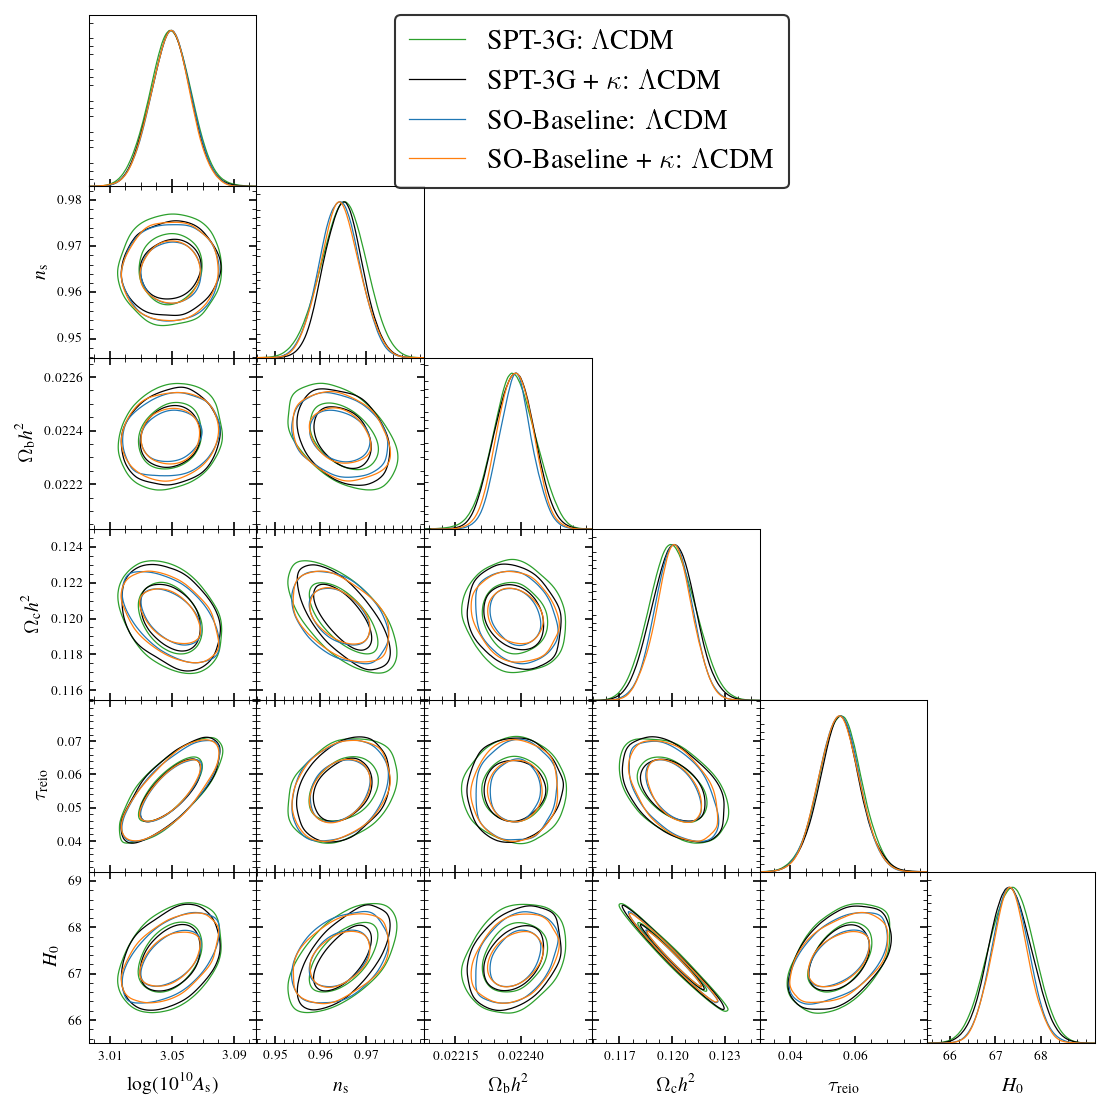

In [63]:
chains_to_plot = [
                 'spt3g_TTEETE_lcdm', 
                 'spt3g_TTEETEPP_lcdm', 
                 'so_baseline_TTEETE_lcdm', 
                 'so_baseline_TTEETEPP_lcdm', 
#                  'so_baseline_plus_lensing', 
#                  'so_baseline_plus_desidr2bao', 
                ]
from getdist.gaussian_mixtures import Gaussian1D, Gaussian2D, GaussianND
samples_to_plot, labels_arr = [], []
contour_colors = []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    
    contour_colors.append( color_dic[chainname] )

paramnames = (samples_dic['spt3g_TTEETE_lcdm'].getParamNames()).list()
remove_params_for_plot = ['As', 'omegam', 'sigma8', 'omegamh2', 'rdrag', 'DHBBN', 'YHe', 'age']
for tmpppp in remove_params_for_plot:
    if tmpppp in paramnames: paramnames.remove(tmpppp)
paramnames_to_plot = []        
for tmpppp in paramnames:
    if tmpppp.lower().find('chi')>-1 or tmpppp.lower().find('logprior')>-1 or tmpppp.lower().find('cal')>-1: 
        continue
    else:
        paramnames_to_plot.append( tmpppp )
    
g = plots.get_subplot_plotter(width_inch=7.5)
g.settings.title_limit_fontsize = 20
g.settings.legend_fontsize = 18
###g.settings.alpha_filled_add = 0.4
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.triangle_plot(samples_to_plot, params=paramnames_to_plot, filled=False, \
                legend_labels = labels_arr, 
                ###param_limits = param_limits_dic, \
                #contour_colors=['darkgreen', 'orangered', 'goldenrod', 'navy', 'black'], 
                ##contour_colors=['tab:blue', 'tab:green', 'tab:red', 'black', 'goldenrod'], 
                contour_colors=contour_colors, 
                analysis_settings={'ignore_rows': 0.5})#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
g.settings.alpha_filled_add=0.8
show(); 


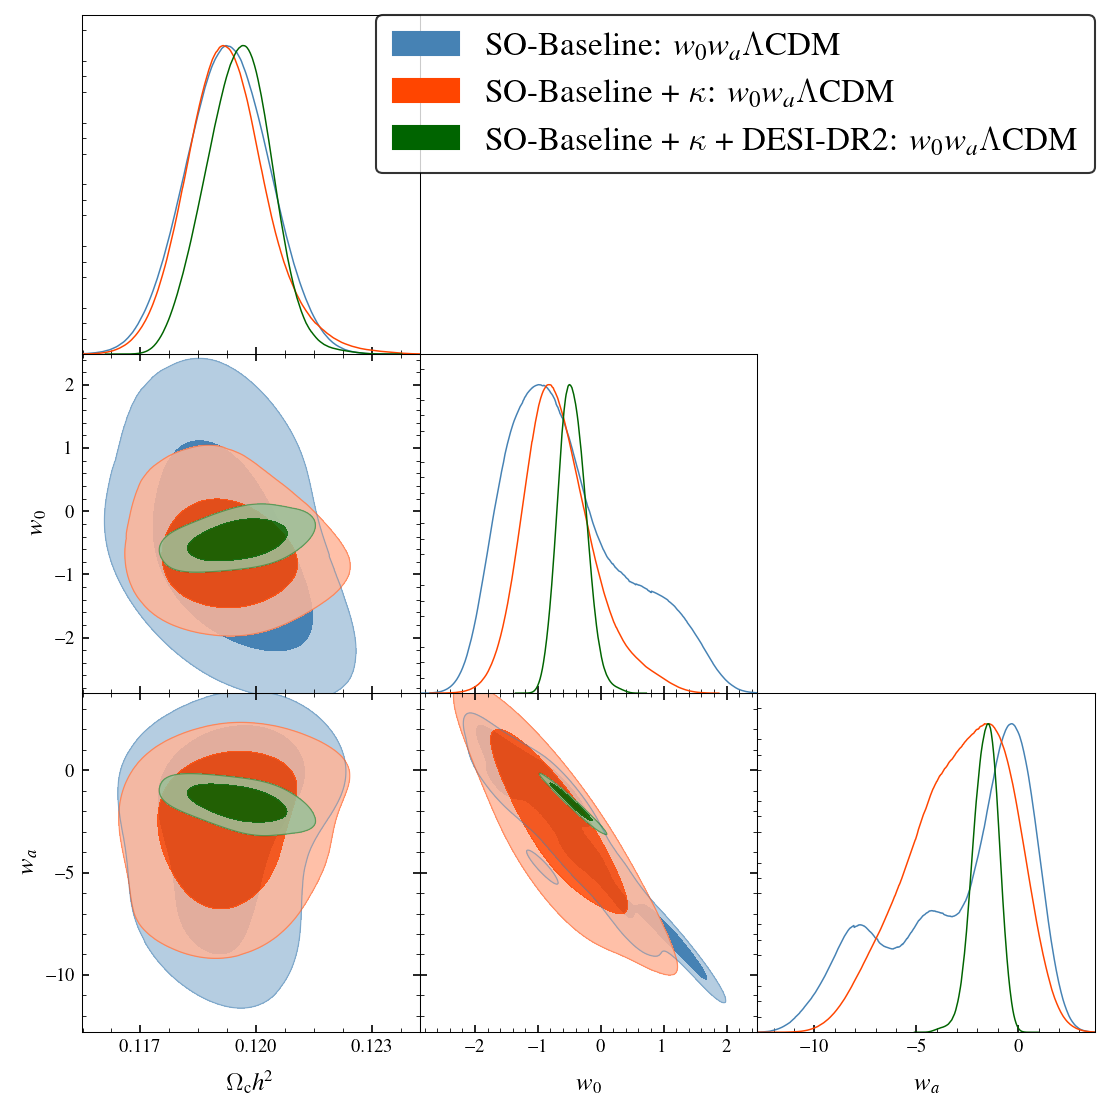

{'w': -1, 'wa': 0.0}


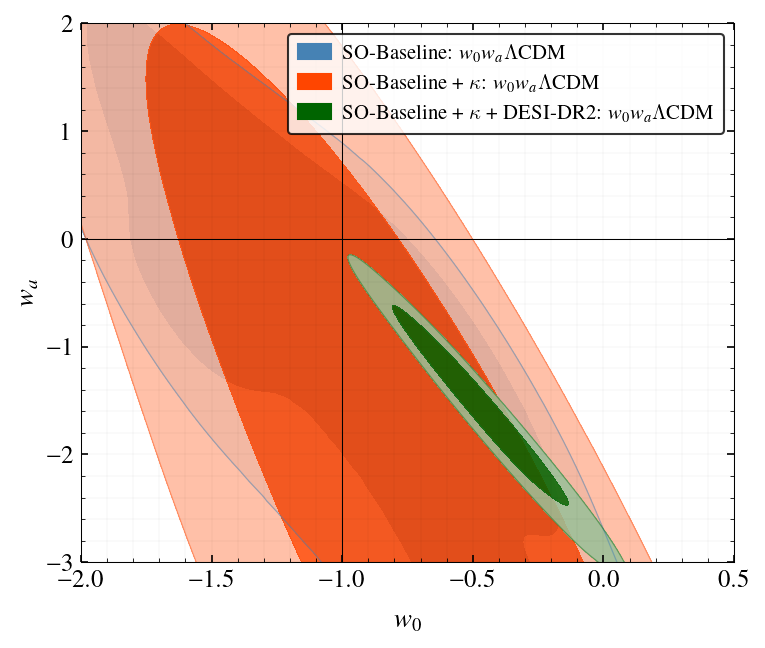

In [64]:
chains_to_plot = [
                 'so_baseline_TTEETE_w0walcdm', 
                 'so_baseline_TTEETEPP_w0walcdm', 
                 'so_baseline_TTEETEPP_desidr2bao_w0walcdm', 
                ]
from getdist.gaussian_mixtures import Gaussian1D, Gaussian2D, GaussianND
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    

g = plots.get_subplot_plotter(width_inch=7.5)
g.settings.title_limit_fontsize = 20
g.settings.legend_fontsize = 18
###g.settings.alpha_filled_add = 0.4
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.triangle_plot(samples_to_plot, params=['omch2', 'w', 'wa'], filled=True, \
                legend_labels = labels_arr, 
                ###param_limits = param_limits_dic, \
                #contour_colors=['darkgreen', 'orangered', 'goldenrod', 'navy', 'black'], 
                ##contour_colors=['tab:blue', 'tab:green', 'tab:red', 'black', 'goldenrod'], 
                contour_colors=['steelblue', 'orangered', 'darkgreen', 'black'], 
                analysis_settings={'ignore_rows': 0.5})#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
g.settings.alpha_filled_add=0.8
show(); 
    
paramnames = ['w', 'wa']
param_limits_dic = {'w': [-4, 4.], 'wa': [-4, 4.]}
param_limits_dic = {'omegam': [0.2, 0.6], 'w': [-2., 0.5], 'wa': [-3., 2.]}
g = plots.get_subplot_plotter(width_inch=5.2)
g.settings.legend_fontsize = 10
g.settings.num_plot_contours = 2
g.settings.subplot_size_ratio = 0.85
g.settings.scaling = False #True
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 13
g.plots_2d(samples_to_plot, param_pairs=[['w', 'wa']], filled=True, \
           lims = [param_limits_dic['w'][0], param_limits_dic['w'][1], param_limits_dic['wa'][0], param_limits_dic['wa'][1]], 
           #legend_labels = labels_arr, \
           legend_labels = '',
           colors=['steelblue', 'orangered', 'darkgreen', 'black'], 
           )#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names)

chainname_for_bestfit = 'so_baseline_TTEETEPP_desidr2bao_w0walcdm'    
samples_for_bestfit = samples_dic[chainname_for_bestfit]
paramnames = np.asarray( samples_for_bestfit.getParamNames().list() )
best_fit_dic = {'w': -1, 'wa': 0.}
if (0):
    for ppp in ['w', 'wa']:
        pind = np.where( paramnames == ppp )[0]
        best_fit_dic[ppp] = samples_for_bestfit.getMeans()[pind][0]

for ax in g.subplots[:,0]:
    #ax.axvline(-1., lw = 0.2, alpha = 0.5, ls = '-.'); ax.axhline(0., lw = 0.2, alpha = 0.5, ls = '-.')
    ax.axvline(best_fit_dic['w'], lw = 0.5, alpha = 1.); 
    ax.axhline(best_fit_dic['wa'], lw = 0.5, alpha = 1.)
    #ax.plot([], [], 'k-', lw = 0.5, alpha = 1., label = r'[$w, w_{a}$ = (%g, %g)]' %(best_fit_dic['w'], best_fit_dic['wa']))    
ax.grid(True, lw = 0.2, alpha = 0.1, which = 'both', axis = 'both', zorder = -10)
g.add_legend(labels_arr, colored_text=False, legend_loc = 1, handlelength = 1.6, handletextpad = 0.5);

print(best_fit_dic)    
show(); #sys.exit()

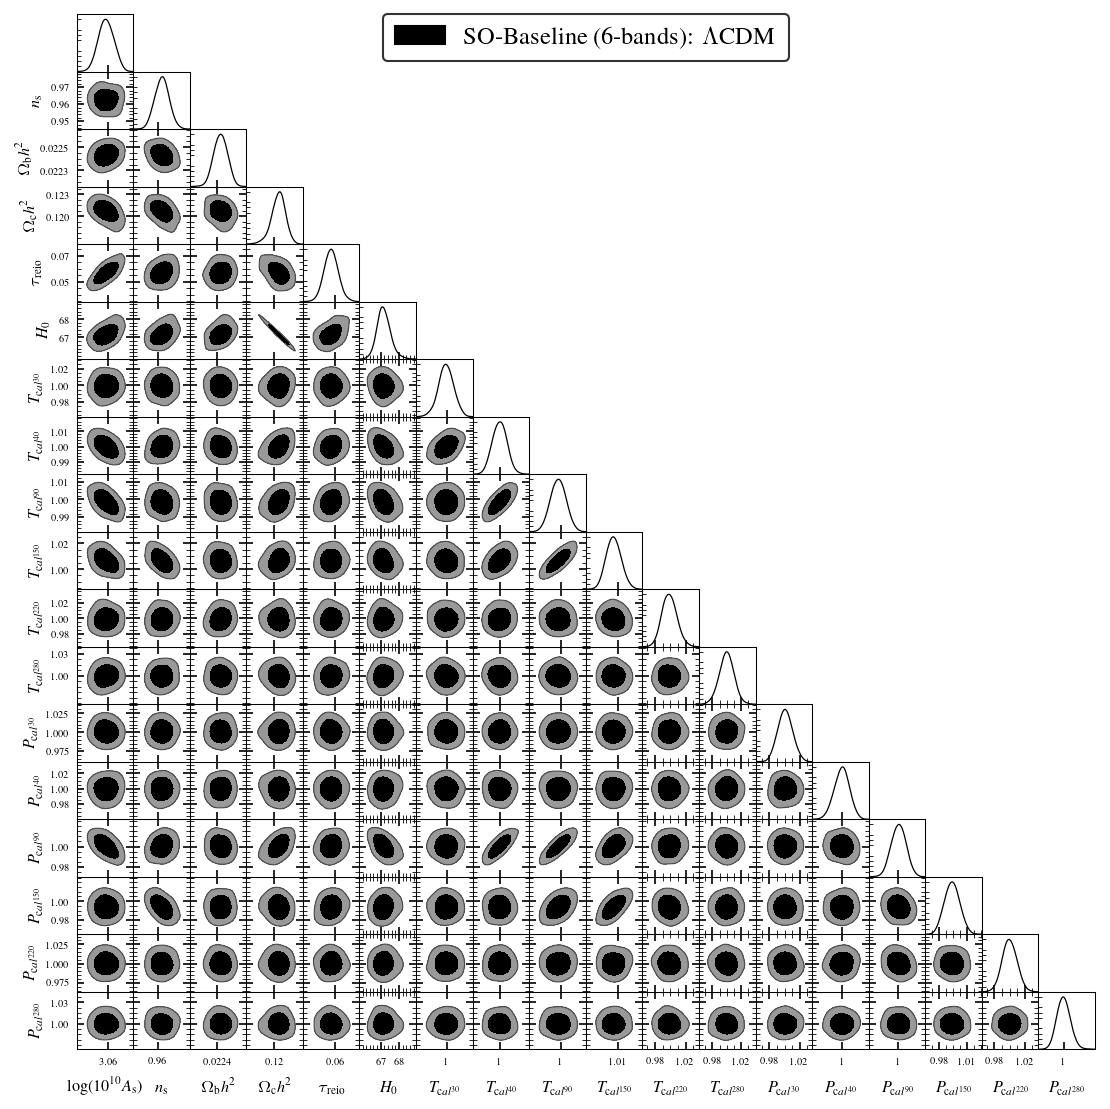

In [258]:
chains_to_plot = [
                 'so_baseline_multiplebands', 
                ]

from getdist.gaussian_mixtures import Gaussian1D, Gaussian2D, GaussianND
samples_to_plot, labels_arr = [], []
contour_colors = []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    
    contour_colors.append( color_dic[chainname] )

paramnames = (samples_dic[chainname].getParamNames()).list()
remove_params_for_plot = ['As', 'omegam', 'sigma8', 'omegamh2', 'rdrag', 'DHBBN', 'YHe', 'age']
for tmpppp in remove_params_for_plot:
    if tmpppp in paramnames: paramnames.remove(tmpppp)
paramnames_to_plot = []        
for tmpppp in paramnames:
    if tmpppp.lower().find('chi')>-1 or tmpppp.lower().find('logprior')>-1: 
        continue
    else:
        paramnames_to_plot.append( tmpppp )
    
g = plots.get_subplot_plotter(width_inch=7.5)
g.settings.title_limit_fontsize = 20
g.settings.legend_fontsize = 18
###g.settings.alpha_filled_add = 0.4
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.triangle_plot(samples_to_plot, params=paramnames_to_plot, filled=True, \
                legend_labels = labels_arr, 
                ###param_limits = param_limits_dic, \
                #contour_colors=['darkgreen', 'orangered', 'goldenrod', 'navy', 'black'], 
                ##contour_colors=['tab:blue', 'tab:green', 'tab:red', 'black', 'goldenrod'], 
                contour_colors=contour_colors, 
                analysis_settings={'ignore_rows': 0.5})#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
g.settings.alpha_filled_add=0.8
show(); 


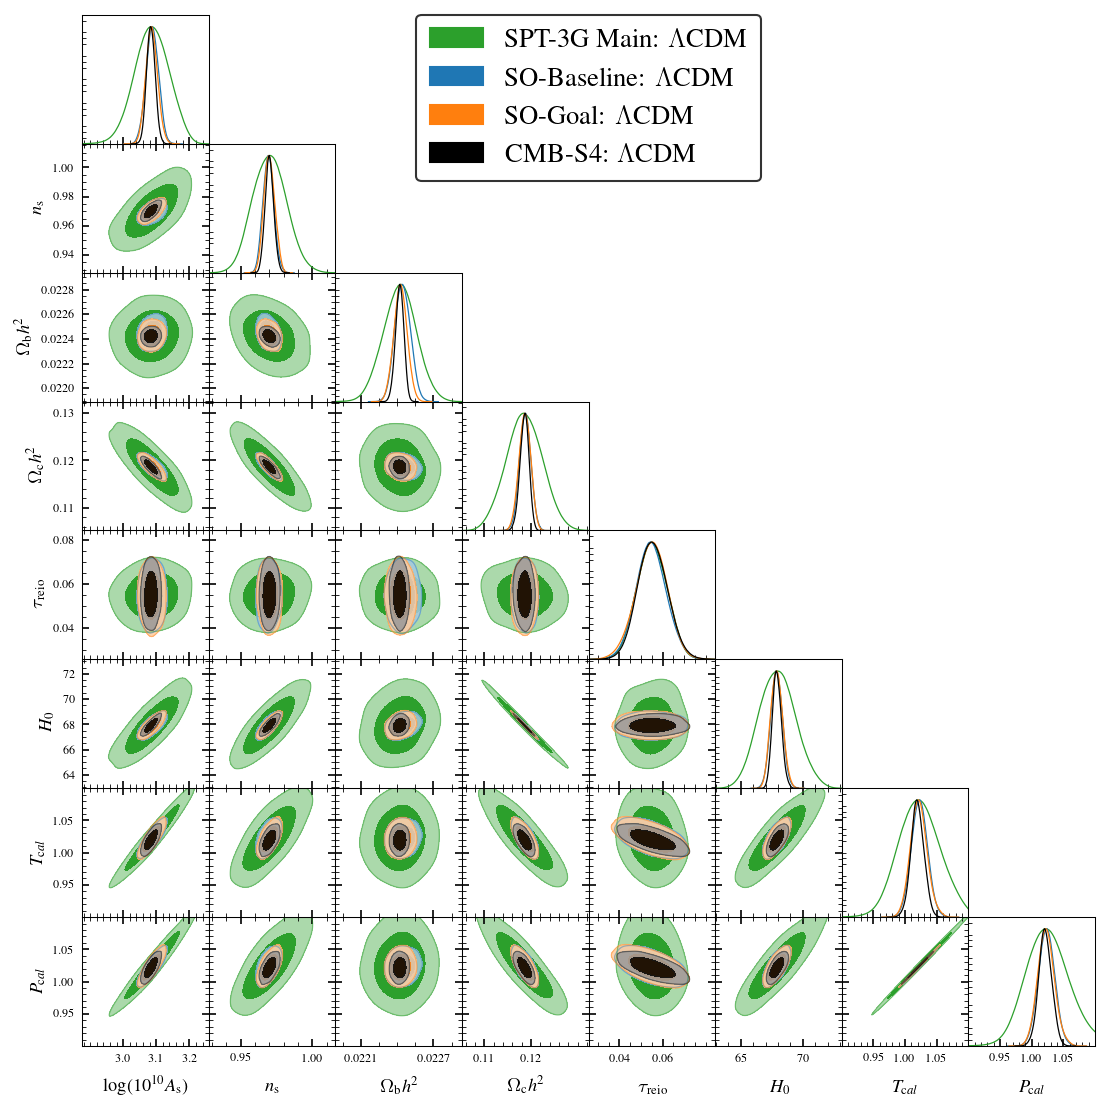

In [194]:
chains_to_plot = [
                 'spt3g_winter', 
                 'so_baseline', 
                 'so_goal', 
                 's4_wide', 
                ]
from getdist.gaussian_mixtures import Gaussian1D, Gaussian2D, GaussianND
samples_to_plot, labels_arr = [], []
contour_colors = []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    
    contour_colors.append( color_dic[chainname] )

paramnames = (samples_dic[chainname].getParamNames()).list()
remove_params_for_plot = ['As', 'omegam', 'sigma8', 'omegamh2', 'rdrag', 'DHBBN', 'YHe', 'age']
for tmpppp in remove_params_for_plot:
    if tmpppp in paramnames: paramnames.remove(tmpppp)
paramnames_to_plot = []        
for tmpppp in paramnames:
    if tmpppp.lower().find('chi')>-1 or tmpppp.lower().find('logprior')>-1: 
        continue
    else:
        paramnames_to_plot.append( tmpppp )

'''
g = plots.get_single_plotter(width_inch=4)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
#add tau prior
tau_covariance_planck = 0.007#**2
tau_mean_planck = 0.055
tau_prior=Gaussian1D(tau_mean_planck, tau_covariance_planck)
g.plots_1d(tau_prior, color = 'hotpink', lw = 2., ls = '--')

g.plot_1d(samples_to_plot, 'tau', \
                legend_labels = labels_arr, 
                ###param_limits = param_limits_dic, \
                #contour_colors=['darkgreen', 'orangered', 'goldenrod', 'navy', 'black'], 
                ##contour_colors=['tab:blue', 'tab:green', 'tab:red', 'black', 'goldenrod'], 
                colors=contour_colors, 
                analysis_settings={'ignore_rows': 0.5})#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)


show(); ##sys.exit()
'''

g = plots.get_subplot_plotter(width_inch=7.5)
g.settings.title_limit_fontsize = 20
g.settings.legend_fontsize = 18
###g.settings.alpha_filled_add = 0.4
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.triangle_plot(samples_to_plot, params=paramnames, filled=True, \
                legend_labels = labels_arr, 
                ###param_limits = param_limits_dic, \
                #contour_colors=['darkgreen', 'orangered', 'goldenrod', 'navy', 'black'], 
                ##contour_colors=['tab:blue', 'tab:green', 'tab:red', 'black', 'goldenrod'], 
                contour_colors=contour_colors, 
                analysis_settings={'ignore_rows': 0.5})#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
g.settings.alpha_filled_add=0.8
show(); 


In [ ]:
chains_to_plot = [
                 'so_baseline_test', 
                 'so_baseline', 
                 #'spt3g_winter', 
                 #'spt_hiell_2020_lmax4000',
                 #'so_baseline_plus_desidr2bao', 
                ]
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    


paramnames = (samples_dic['so_baseline_test'].getParamNames()).list()
paramnames.remove('chi2')
paramnames.remove('chi2__cmb.so_baseline')
if 'As' in paramnames: paramnames.remove('As')
g = plots.get_subplot_plotter(width_inch=6.)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.triangle_plot(samples_to_plot, params=paramnames, filled=True, \
                legend_labels = labels_arr, 
                param_limits = param_limits_dic, \
                #contour_colors=['darkgreen', 'orangered', 'goldenrod', 'navy', 'black'], 
                ##contour_colors=['tab:blue', 'tab:green', 'tab:red', 'black', 'goldenrod'], 
                contour_colors=['black', 'royalblue'], 
                fontsize = 12, 
                analysis_settings={'ignore_rows': 0.5})#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
g.settings.alpha_filled_add=0.8
show(); 

{'w': -0.7538320052521371, 'wa': -0.844684011831229}


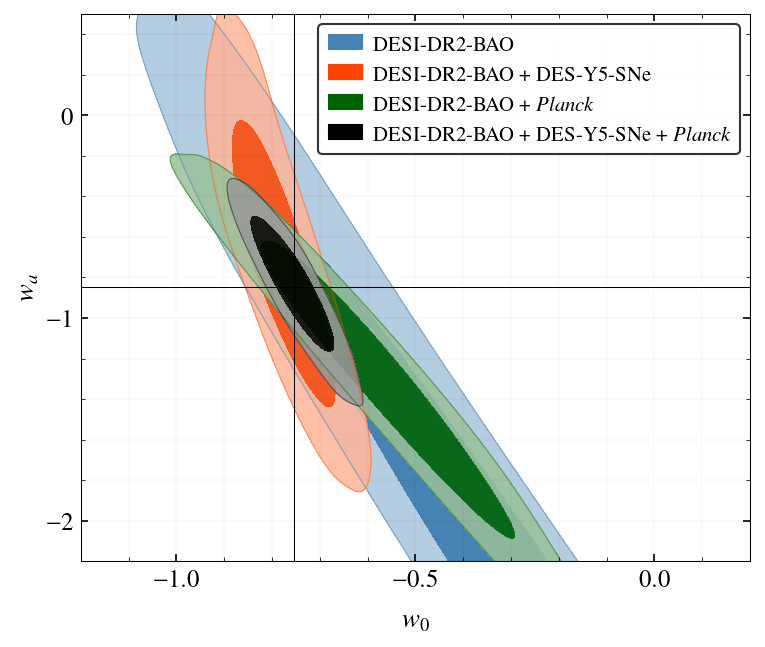

In [153]:
param_limits_dic = {'ombh2': [0., 1.], 'omch2': [0.1, 0.2]}
g = plots.get_subplot_plotter(width_inch=5.2)
g.settings.legend_fontsize = 10
g.settings.num_plot_contours = 2
g.settings.subplot_size_ratio = 0.85
g.settings.scaling = False #True
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 13
g.plots_2d(samples_to_plot, param_pairs=[['w', 'wa']], filled=True, \
           lims = [param_limits_dic['w'][0], param_limits_dic['w'][1], param_limits_dic['wa'][0], param_limits_dic['wa'][1]], 
           #legend_labels = labels_arr, \
           legend_labels = '',
           colors=['steelblue', 'orangered', 'darkgreen', 'black'], 
           )#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names)

chainname_for_bestfit = 'desibaoplusdesy5sneplusplanckcmb_w0walcdm'    
samples_for_bestfit = samples_dic[chainname_for_bestfit]
paramnames = np.asarray( samples_for_bestfit.getParamNames().list() )
best_fit_dic = {}
for ppp in ['w', 'wa']:
    pind = np.where( paramnames == ppp )[0]
    best_fit_dic[ppp] = samples_for_bestfit.getMeans()[pind][0]

for ax in g.subplots[:,0]:
    #ax.axvline(-1., lw = 0.2, alpha = 0.5, ls = '-.'); ax.axhline(0., lw = 0.2, alpha = 0.5, ls = '-.')
    ax.axvline(best_fit_dic['w'], lw = 0.5, alpha = 1.); 
    ax.axhline(best_fit_dic['wa'], lw = 0.5, alpha = 1.)
    #ax.plot([], [], 'k-', lw = 0.5, alpha = 1., label = r'[$w, w_{a}$ = (%g, %g)]' %(best_fit_dic['w'], best_fit_dic['wa']))    
ax.grid(True, lw = 0.2, alpha = 0.1, which = 'both', axis = 'both', zorder = -10)
g.add_legend(labels_arr, colored_text=False, legend_loc = 1, handlelength = 1.6, handletextpad = 0.5);

print(best_fit_dic)    
show(); #sys.exit()


# DES-Y5 SNe-Ia

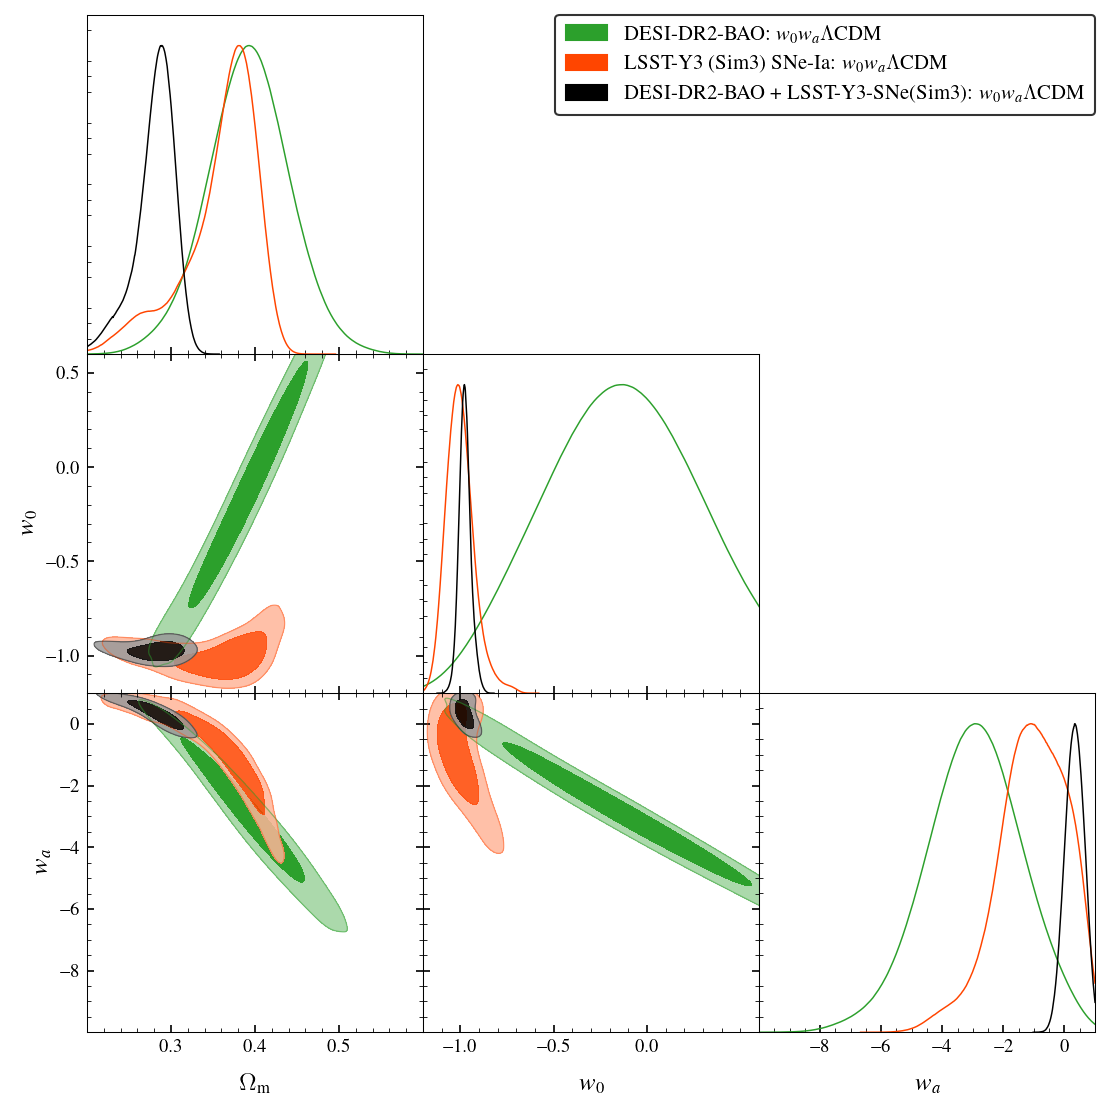

In [59]:
#---- 
#https://arxiv.org/pdf/2401.02929
#Fig. 6.
for iter in range(2, 3):
    if iter == 0:
        chains_to_plot = ['desy5sne_lcdm', 'desy5sne_w0lcdm', 'desy5sne_w0walcdm']
    elif iter == 1:
        chains_to_plot = ['desy5sne_w0lcdm', 'desy5sne_w0walcdm']
    elif iter == 2:
        #chains_to_plot = ['desy5sne_w0walcdm_prioromegamv2', 'desy5sne_w0walcdm_restricted_prior', 'desy5sne_w0walcdm_prioromegamv3', 'desy5sne_w0walcdm_prioromegam', 'desy5sne_w0walcdm']
        #chains_to_plot = ['desy5sne_w0walcdm', 'pantheon_w0walcdm', 'union_w0walcdm']
        #chains_to_plot = ['desy5sne_w0walcdm', 'desy5snesim_w0walcdm', 'lssty3snesim1_w0walcdm', 'desibaopluslssty3sim1sne_w0walcdm']
        #chains_to_plot = ['desibao_w0walcdm', 'lssty3snesim1_w0walcdm', 'desibaopluslssty3sim1sne_w0walcdm']
        chains_to_plot = ['desibao_w0walcdm', 'lssty3snesim3_w0walcdm', 'desibaopluslssty3sim3sne_w0walcdm']
        '''
        chains_to_plot = ['lssty3snesim1_w0walcdm', 
                          'lssty3snesim1diagcov_w0walcdm', 
                          #'lssty3snesim2_w0walcdm', 'lssty3snesim3_w0walcdm', 'lssty3snesim4_w0walcdm', 'lssty3snesim5_w0walcdm'
                         ]
        '''
        #chains_to_plot = ['desy5sne_w0walcdm_restricted_prior', 'desy5sne_w0walcdm']
    samples_to_plot, labels_arr = [], []
    for chainname in chains_to_plot:
        samples_to_plot.append( samples_dic[chainname] )
        labels_arr.append( chains_dic[chainname] )    

    #param_limits_dic = {'omegam': [0.1, 0.6], 'w': [-2., 1.], 'wa': [-2, 2.]}
    param_limits_dic = {'omegam': [0.2, 0.6], 'w': [-1.2, 0.6], 'wa': [-10, 1.]}
    #param_limits_dic = {'omegam': [0.1, 0.5], 'w': [-1.5, 0.], 'wa': [-1, 1.]}

    if iter == 0:
        g = plots.get_single_plotter(width_inch=4.6)
        g.plot_1d(samples_to_plot, 'omegam', param_limits = param_limits_dic, \
                  legend_labels = labels_arr, normalized = False, \
                 lims = [param_limits_dic['omegam'][0], param_limits_dic['omegam'][1]], \
                 colors=['black', 'tab:red', 'green'])
        g.add_legend(labels_arr, colored_text=True, fontsize = 10);
        show()
    elif iter == 1:
        g = plots.get_subplot_plotter(width_inch=2.5)
        g.settings.scaling = True
        g.plots_2d(samples_to_plot, param_pairs=[['omegam', 'w']], filled=True, \
                   param_limits = param_limits_dic, legend_labels = labels_arr, \
                   colors=['tab:red', 'green'])#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names)
        show(); #sys.exit()

    elif iter == 2:
        '''
        g = plots.get_single_plotter(width_inch=4.6)
        g.plot_1d(samples_to_plot, 'wpluswa', param_limits = param_limits_dic, \
                  legend_labels = labels_arr, normalized = False,
                 colors=['green'])
        g.add_legend(labels_arr, colored_text=True, fontsize = 10);
        show(); sys.exit()

        g = plots.get_subplot_plotter(width_inch=2.5)
        g.settings.scaling = True
        g.plots_2d(samples_to_plot, param_pairs=[['omegam', 'wpluswa']], filled=True, legend_labels = labels_arr, \
                   colors=['green'])#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names)
        show(); #sys.exit()
        '''
        
        '''
        g = plots.get_subplot_plotter(width_inch=2.5)
        g.settings.scaling = True
        g.plots_2d(samples_to_plot, param_pairs=[['omegam', 'wa']], filled=True, param_limits = param_limits_dic, legend_labels = labels_arr)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names)
        show(); ##sys.exit()

        g = plots.get_subplot_plotter(width_inch=2.5)
        g.settings.scaling = True
        g.plots_2d(samples_to_plot, param_pairs=[['w', 'wa']], filled=True, param_limits = param_limits_dic, legend_labels = labels_arr)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names)
        show(); ##sys.exit()
        '''

        g = plots.get_subplot_plotter(width_inch=7.5)
        g.settings.scaling = True # prevent scaling down font sizes even though small subplots
        g.triangle_plot(samples_to_plot, params=['omegam', 'w', 'wa'], filled=True, \
                        legend_labels = labels_arr, param_limits = param_limits_dic, \
                        #contour_colors=['darkgreen', 'orangered', 'goldenrod', 'navy', 'black'], 
                        ##contour_colors=['tab:blue', 'tab:green', 'tab:red', 'black', 'goldenrod'], 
                        contour_colors=['tab:green', 'orangered', 'black', 'goldenrod'], 
                        fontsize = 12, 
                        analysis_settings={'ignore_rows': 0.5})#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
        g.settings.alpha_filled_add=0.8
        show(); 
    

# DESI BAO

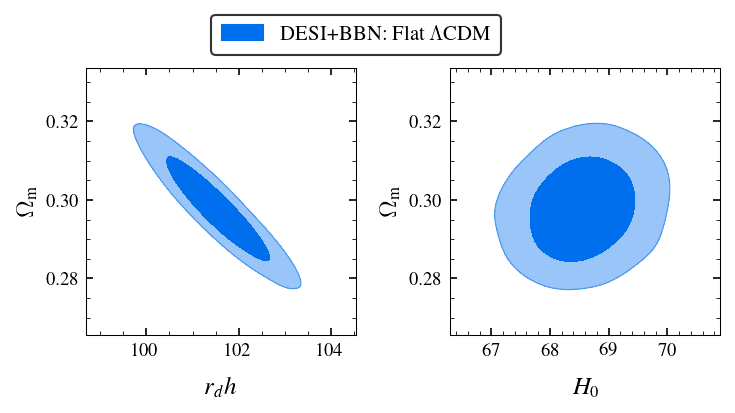

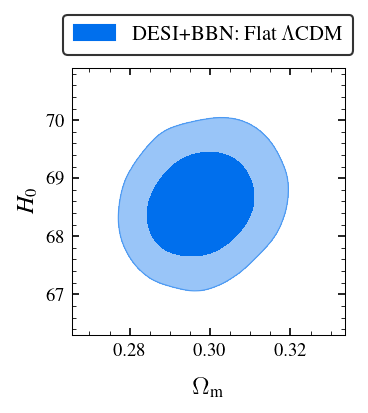

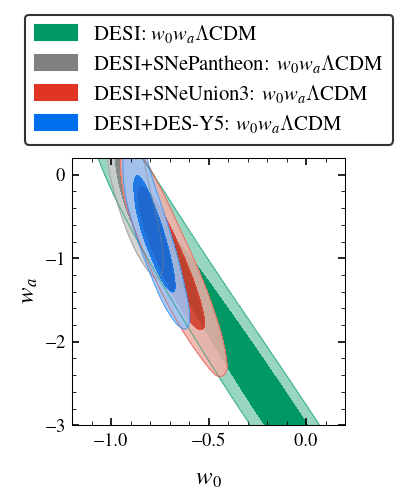

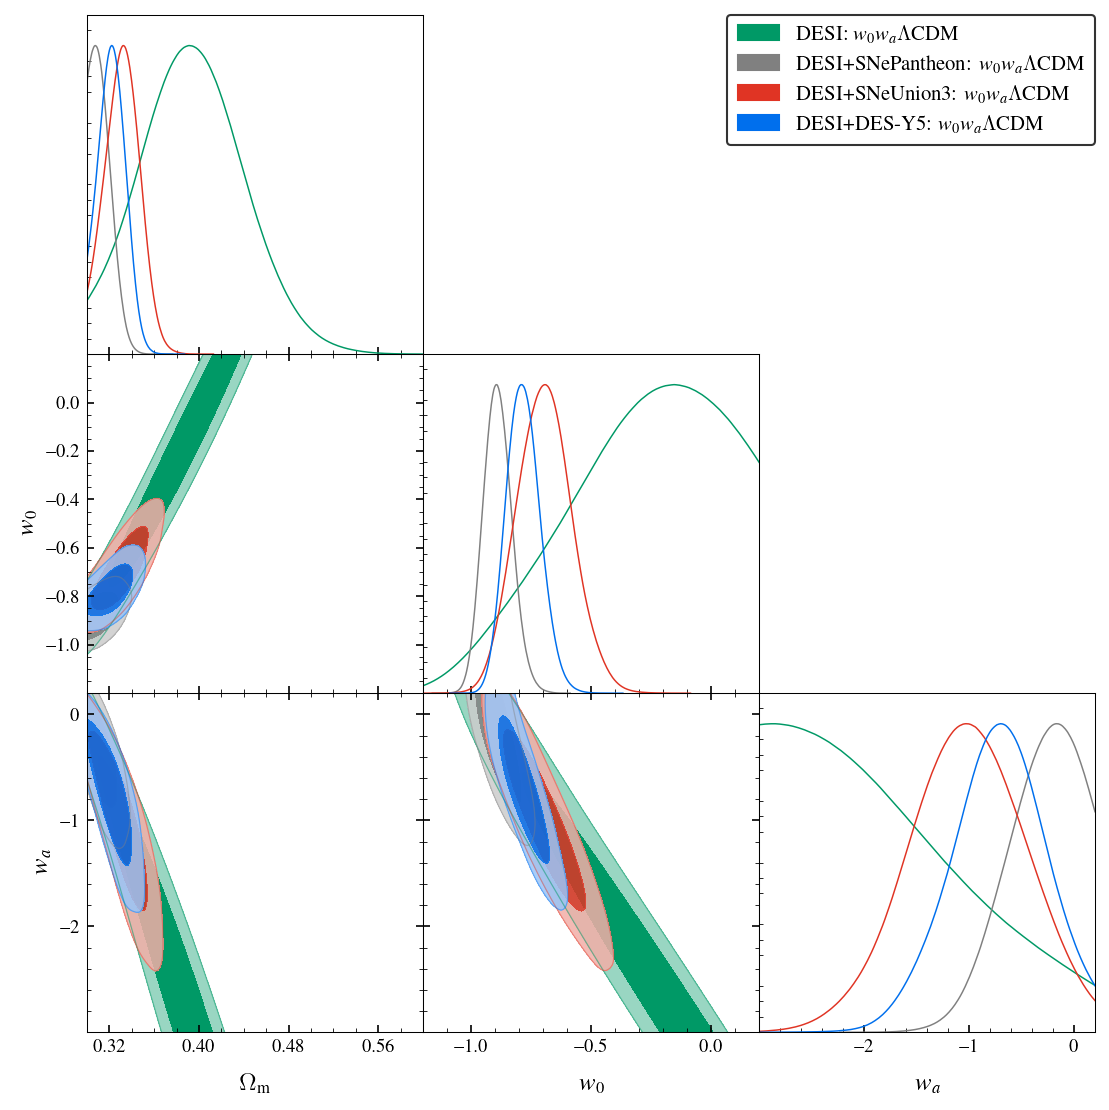

SystemExit: 

In [33]:
param_limits_dic = {'omegam': [0.3, 0.6], 'omch2': [0.25, 0.34], 'w': [-1.2, 0.2], 'wa': [-3, 0.2]}
#---- 
#Fig. 8 of https://arxiv.org/pdf/2503.14738
#omegam vs H0, and omegam vs H_rd
#chains_to_plot = ['desibao_flatlcdm_bbnombh2prior', 'desibao_w0walcdm', 'desibaoplusunion3_w0walcdm', 'desibaopluspantheonplus_w0walcdm']
chains_to_plot = ['desibao_flatlcdm_bbnombh2prior'] #['desibao_flatlcdm', 'desibao_flatlcdm_bbnombh2prior', 'desibao_w0lcdm', 'desibao_w0walcdm']
#chains_to_plot = ['desibao_w0walcdm_fixedhplanckcmb', 'desibao_w0walcdm_fixedhsne']
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    

g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d(samples_to_plot, param_pairs=[['rdh', 'omegam'], ['H0', 'omegam']], filled=True, nx = 2, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
#g.plots_2d(samples_to_plot, param_pairs=[['rdh', 'omegam']], filled=True, nx = 1, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); ##sys.exit()

#Fig. 9 of https://arxiv.org/pdf/2503.14738
#H0 vs omegam for DESI + BBN
#chains_to_plot = ['desibao_flatlcdm_bbnombh2prior', 'desibao_w0walcdm', 'desibaoplusunion3_w0walcdm', 'desibaopluspantheonplus_w0walcdm']
chains_to_plot = ['desibao_flatlcdm_bbnombh2prior']
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    

g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d(samples_to_plot, param_pairs=[['omegam', 'H0']], filled=True, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); ##sys.exit()


#Fig. 11 of https://arxiv.org/pdf/2503.14738
#wa vs w0 for desibao_w0walcdm, desibaoplusunion3_w0walcdm, desibaopluspantheonplus_w0walcdm
#chains_to_plot = ['desibao_w0walcdm_fixedhplanckcmb', 'desibao_w0walcdm_fixedhsne'] ##['desibao_w0walcdm', 'desibao_w0walcdm_bbnombh2prior', 'desibaoplusunion3_w0walcdm', 'desibaopluspantheonplus_w0walcdm', 'desibao_w0walcdm_fixedhplanckcmb']
chains_to_plot = ['desibao_w0walcdm', 'desibaopluspantheonplussne_w0walcdm', 'desibaoplusunion3sne_w0walcdm', 'desibaoplusdesy5sne_w0walcdm']
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    

g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d(samples_to_plot, param_pairs=[['w', 'wa']], filled=True, legend_labels = labels_arr, lims = [param_limits_dic['w'][0], param_limits_dic['w'][1], param_limits_dic['wa'][0], param_limits_dic['wa'][1]])#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); ##sys.exit()


chains_to_plot = ['desibao_w0walcdm', 'desibaopluspantheonplussne_w0walcdm', 'desibaoplusunion3sne_w0walcdm', 'desibaoplusdesy5sne_w0walcdm']
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    
g = plots.get_subplot_plotter(width_inch=7.5)#auto_close = True, width_inch=7.)
g.triangle_plot(samples_to_plot, ['omegam', 'w', 'wa'], filled=True, legend_labels = labels_arr, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); sys.exit()


g = plots.get_subplot_plotter(width_inch=7.5)#auto_close = True, width_inch=7.)
#g.triangle_plot(samples, ['ombh2', 'omch2', 'sigma8'], filled=True, contour_colors = ['black'])#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
#g.triangle_plot(samples, ['H0', 'omegam', 'theta_MC_100', 'ombh2'], filled=True, contour_colors = ['black'], labels = ['Hrdrag', 'omegam'])#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
#g.triangle_plot([samples1, samples2], ['H0', 'omegam'], filled=True)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
g.triangle_plot(samples_arr, ['rdh', 'omegam'], filled=True, legend_labels = labels_arr, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); sys.exit()

g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d(samples_arr, param_pairs=[['H0', 'omegam'], ['rdh', 'omegam']], filled=True, nx = 2, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); sys.exit()

#DE constraints
samples_arr = [samples_w0walcdm, samples_desibaoplusunion3_w0walcdm, samples_desibaopluspantheonplus_w0walcdm, samples_w0lcdm]
labels_arr = ['DESI+BBN: $w_{0}w_{a} \Lambda$CDM', 'DESI+SNeUnion3: $w_{0}w_{a} \Lambda$CDM', 'DESI+SNePantheon: $w_{0}w_{a} \Lambda$CDM', 'DESI+BBN: $w_{0} \Lambda$CDM']

samples_arr = [samples_w0walcdm, samples_desibaopluspantheonplus_w0walcdm, samples_w0lcdm]
labels_arr = ['DESI+BBN: $w_{0}w_{a} \Lambda$CDM', 'DESI+SNe: $w_{0}w_{a} \Lambda$CDM', 'DESI+BBN: $w_{0} \Lambda$CDM']

g = plots.get_subplot_plotter(width_inch=7.5)#auto_close = True, width_inch=7.)
g.triangle_plot(samples_arr, ['w', 'wa'], filled=True, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show()

g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d(samples_arr, param_pairs=[['w', 'wa']], filled=True, legend_labels = labels_arr, lims = [])#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show()

sys.exit()

'''

g = plots.get_subplot_plotter(width_inch=7.5)#auto_close = True, width_inch=7.)
#g.triangle_plot(samples, ['ombh2', 'omch2', 'sigma8'], filled=True, contour_colors = ['black'])#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
#g.triangle_plot(samples, ['H0', 'omegam', 'theta_MC_100', 'ombh2'], filled=True, contour_colors = ['black'], labels = ['Hrdrag', 'omegam'])#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
g.triangle_plot([samples1, samples2], ['rdh', 'omegam'], filled=True)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show()
'''

g = plots.get_subplot_plotter(subplot_size=4.)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d([samples1, samples2], param_pairs=[['H0', 'omegam'], ['rdh', 'omegam']], filled=True, nx = 2, legend_loc = 1)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show()


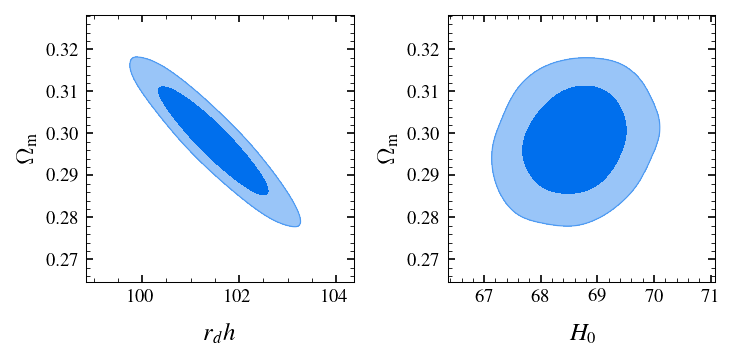

In [86]:
g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d(samples_to_plot, param_pairs=[['rdh', 'omegam'], ['H0', 'omegam']], filled=True, nx = 2)#, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)

show(); 

In [85]:
g.plots_2d??

In [78]:
ppp.

AttributeError: 'str' object has no attribute 'name'

In [82]:
ppp.title()

'H0'

In [47]:
g.plots_2d??

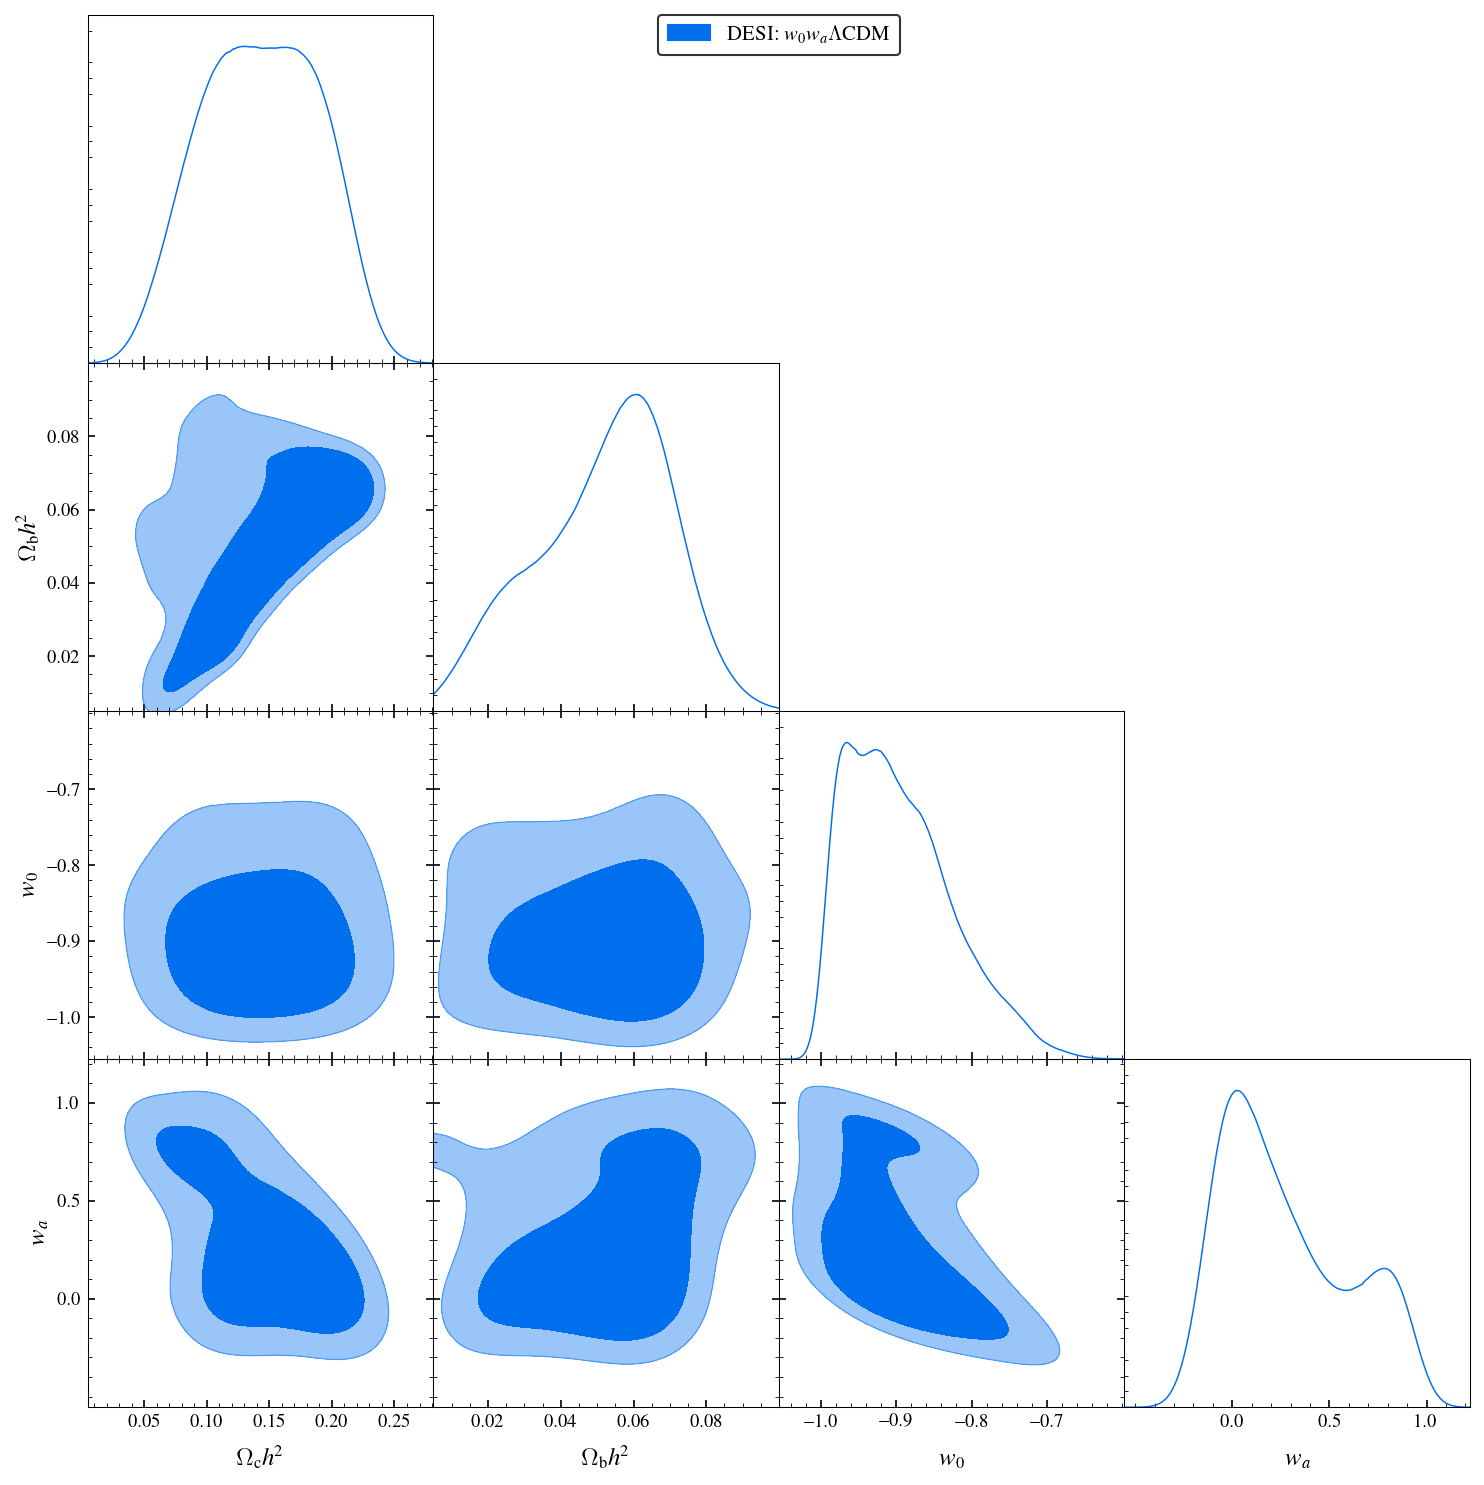

SystemExit: 

In [18]:
#omch2, ombh2, wa and w0
#chains_to_plot = ['desibao_w0walcdm_fixedhplanckcmb', 'desibao_w0walcdm_fixedhsne']
chains_to_plot = ['desibao_w0walcdm']
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    

g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.triangle_plot(samples_to_plot, ['omch2', 'ombh2', 'w', 'wa'], filled=True, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); sys.exit()

In [ ]:
#Fig. 11 of https://arxiv.org/pdf/2503.14738
#wa vs w0 for desibao_w0walcdm, desibaoplusunion3_w0walcdm, desibaopluspantheonplus_w0walcdm
chains_to_plot = ['desibao_w0lcdm']##, 'desibaoplusunion3_w0walcdm', 'desibaopluspantheonplus_w0walcdm']
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    

g = plots.get_subplot_plotter(width_inch=7.5)#auto_close = True, width_inch=7.)
g.triangle_plot(samples_to_plot, param_pairs=[['w', 'wa', 'omegam']], filled=True, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); sys.exit()

KeyboardInterrupt: 

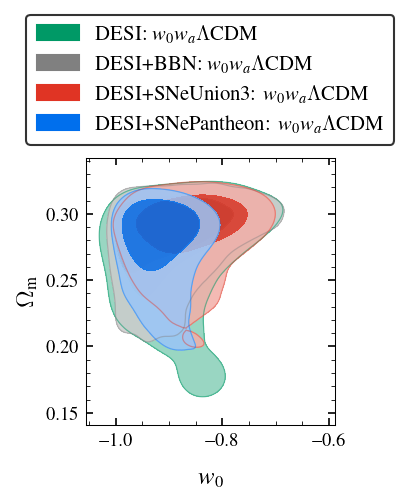

SystemExit: 

In [13]:
#Fig. 11 of https://arxiv.org/pdf/2503.14738
#wa vs w0 for desibao_w0walcdm, desibaoplusunion3_w0walcdm, desibaopluspantheonplus_w0walcdm
chains_to_plot = ['desibao_w0lcdm']
samples_to_plot, labels_arr = [], []
for chainname in chains_to_plot:
    samples_to_plot.append( samples_dic[chainname] )
    labels_arr.append( chains_dic[chainname] )    

g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = True # prevent scaling down font sizes even though small subplots
g.plots_2d(samples_to_plot, param_pairs=[['w', 'omegam']], filled=True, legend_labels = labels_arr)#, param_limits = param_limits_dic)#, contour_ls = ls_arr, contour_lw = lw_arr, legend_ncol = len(param_names), param_limits = param_limits_dic)
show(); sys.exit()

In [29]:
print(chainname, samples_dic[chainname].getParamNames())


desibaopluspantheonplus_w0walcdm H0	H_0
ombh2	\Omega_\mathrm{b} h^2
omch2	\Omega_\mathrm{c} h^2
s8h5*	\sigma_8/h^{0.5}
s8omegamp25*	\sigma_8 \Omega_\mathrm{m}^{0.25}
s8omegamp5*	\sigma_8 \Omega_\mathrm{m}^{0.5}
S825*	\sigma_8 (\Omega_\mathrm{m}/0.3)^{0.25}
S85*	\sigma_8 (\Omega_\mathrm{m}/0.3)^{0.5}
sigma8*	\sigma_8
YHe*	Y_\mathrm{P}
age*	{\rm{Age}}/\mathrm{Gyr}
omegam*	\Omega_\mathrm{m}
omegamh2*	\Omega_\mathrm{m} h^2
rdrag*	r_\mathrm{drag}
omega_de*	\Omega_\Lambda
Y_p*	Y_P^\mathrm{BBN}
DHBBN*	10^5 \mathrm{D}/\mathrm{H}
chi2__BAO*	\chi^2_\mathrm{BAO}
minuslogprior*	-\log\pi
minuslogprior__0*	-\log\pi_\mathrm{0}
chi2*	\chi^2
chi2__bao.desi_dr2.desi_bao_all*	\chi^2_\mathrm{bao.desi\ dr2.desi\ bao\ all}
rdh*	r_dh



In [8]:
samples_dic[chainname]

KeyError: <getdist.mcsamples.MCSamples object at 0x129afda30>

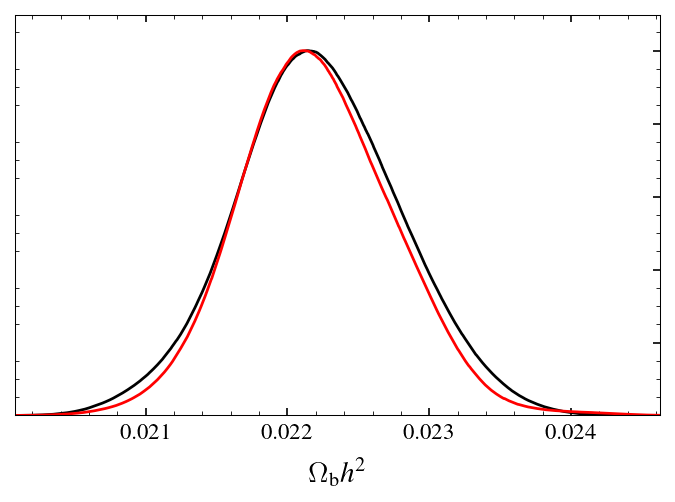

In [19]:
g = plots.get_single_plotter(width_inch=4.6)
g.plot_1d([samples1, samples2], 'ombh2')
show()